In [1]:
def increase_call_stack_limit(mount: int):
    import sys

    # Get the current recursion limit
    current_limit = sys.getrecursionlimit()
    print(f"Current recursion limit: {current_limit}")

    # Set a new recursion limit
    sys.setrecursionlimit(mount)
    print(f"New recursion limit: {mount}")


increase_call_stack_limit(100000)

Current recursion limit: 3000
New recursion limit: 100000


In [2]:
from src.ga.gene.shape.shape_variations import (
    donut_params,
    circle_params,
    triangle_params,
    wing_params,
    hole_params,
    trapezoid_params,
)
from src.ga.gene.shape.shape_gene import ShapeGene

[Storage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__gene_parameters.json
[Storage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__gene_parameters.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__shape_gene_pdf.json


# Generate random shape genes

[StochasticStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_design_1/__shape_gene_pdf.json
[Storage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_design_1/__gene_parameters.json


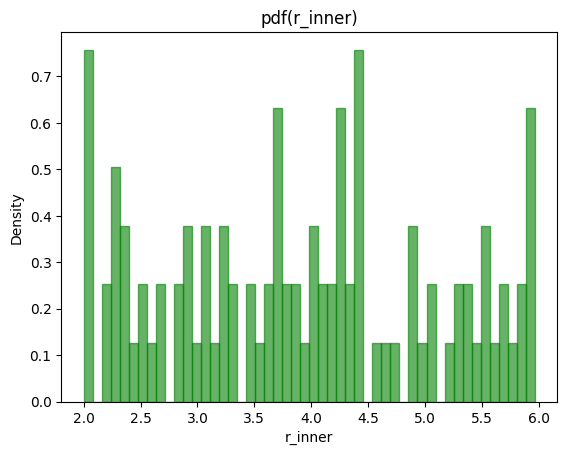

In [3]:
genes: list[ShapeGene] = []
for i in range(100):
    genes.extend(
        [
            ShapeGene(donut_params, gene_id=i),
            ShapeGene(trapezoid_params, gene_id=i),
            ShapeGene(circle_params, gene_id=i),
            ShapeGene(triangle_params, gene_id=i),
            ShapeGene(wing_params, gene_id=i),
            ShapeGene(hole_params, gene_id=i),
        ]
    )

# Mutation logics, uncomment to test
for gene in genes:
    gene.mutate("rand")

ShapeGene.pdf_storage.save()
ShapeGene.parameter_storage.save()

ShapeGene.pdf_storage.plot_distribution("r_inner")

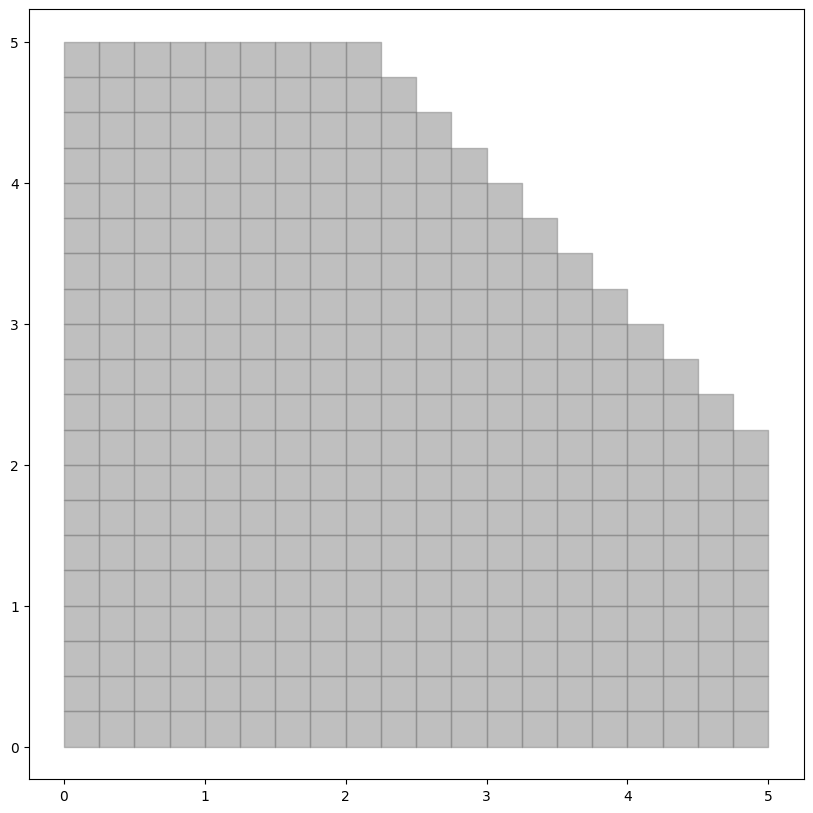

In [4]:
from src.grid.visualize_points import visualize_points


visualize_points(genes[9].pattern_unit.shape_matrix, genes[0].param.k)

# Generate random pattern transformation

In [5]:
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)
from src.ga.gene.pattern.pattern_gene import PatternGene

[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__pattern_gene_pdf.json


[StochasticStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_design_1/__pattern_gene_pdf.json
[Storage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_design_1/__gene_parameters.json


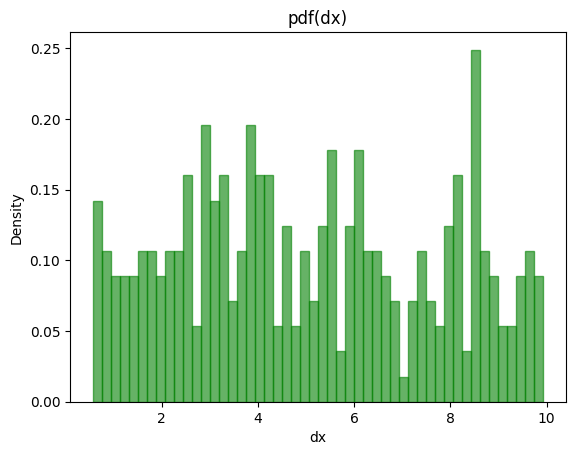

In [6]:
pattern_genes: list[PatternGene] = []
for i in range(100):
    pattern_genes.extend(
        [
            PatternGene(circular_params, gene_id=i),
            PatternGene(corn_params, gene_id=i),
            PatternGene(grid_params, gene_id=i),
        ]
    )

# Mutation logics, uncomment to test
for gene in pattern_genes:
    gene.mutate("rand")

PatternGene.pdf_storage.save()
PatternGene.parameter_storage.save()

PatternGene.pdf_storage.plot_distribution("dx")

# Test combinations with two genes

In [7]:
from src.geometry.pattern_unit import PatternTransformationMatrix, Pattern

combined: list[Pattern] = []

for i in range(100):
    t_mat = Pattern(
        PatternTransformationMatrix(
            genes[i].pattern_unit,
            pattern_genes[i].pattern_transformation,
            pattern_bound=((-35, 35), (-35, 35)),
        ),
    )
    combined.append(t_mat)

In [8]:
def draw_at(i: int):
    print(
        f"Draw > shape: {genes[i].label}, pattern: {pattern_genes[i].param.pattern_type}"
    )
    print(combined[i].pattern_matrix.shape)
    visualize_points(combined[i].pattern_matrix, combined[i].pattern_unit.grid.k)

In [9]:
for i in range(100):
    print("-" * 50)
    print(f"index: {i}")
    print(f"shape: {genes[i].label}, pattern: {pattern_genes[i].param.pattern_type}")
    print(f"dim: {combined[i].pattern_matrix.shape}")
    print(f"Shape Gene: {genes[i].parameter_table}")
    print(f"Pattern Gene: {pattern_genes[i].parameter_table}")

--------------------------------------------------
index: 0
shape: DonutShape_0, pattern: circular_strict
dim: (3188, 2)
Shape Gene: {'r_inner': 4.438202834073808, 'r_outer': 9.924586558905105}
Pattern Gene: {'di': 11.439915758412006, 'dx': 6.282694408036132, 'phi': 0.8675403222840976}
--------------------------------------------------
index: 1
shape: Trapezoid_0, pattern: corn
dim: (4170, 2)
Shape Gene: {'k1': 2.1780638517832474, 'k2': 1.9557068100280195}
Pattern Gene: {'di': 9.471576680153323, 'dx': 1.3492189360958324, 'phi': 0.37913864579051815, 'rot_count': 4.0}
--------------------------------------------------
index: 2
shape: CircleShape_0, pattern: grid_strict
dim: (3000, 2)
Shape Gene: {'r': 2.5952303319453547}
Pattern Gene: {'dx': 2.110928895566235, 'dy': 1.32178852014287}
--------------------------------------------------
index: 3
shape: TriangleShape_0, pattern: circular_strict
dim: (1710, 2)
Shape Gene: {'l': 4.144337387997031}
Pattern Gene: {'di': 13.941151344765673, 'dx':

Draw > shape: Trapezoid_0, pattern: corn
(4170, 2)


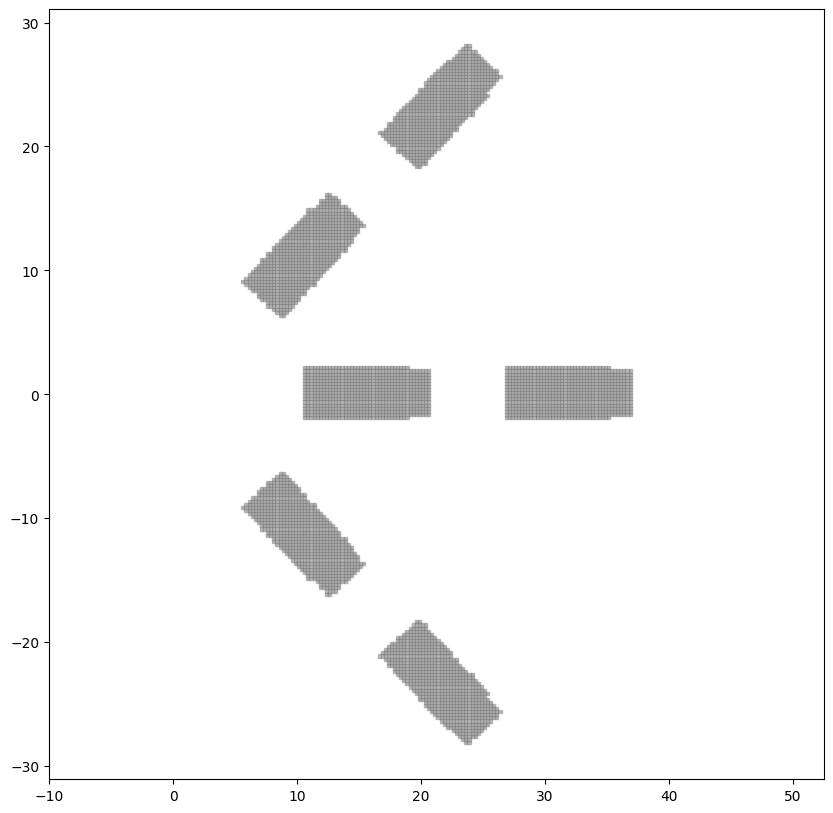

In [10]:
draw_at(1)

In [11]:
# for i in range(100):
#     if combined[i].pattern_matrix.shape[0] < 10000:
#         draw_at(i)

In [12]:
# for i in range(100):
#     if (
#         combined[i].pattern_matrix.shape[0] > 10000
#         and combined[i].pattern_matrix.shape[0] < 20000
#     ):
#         draw_at(i)